# Denoising by spectral substraction

### Importation of necessairy libraire

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio,clear_output
import numpy as np
import scipy.signal 
import scipy.fft as fft

### Importation of differents audio files

In [4]:
# load the original music file
music_file_1 = "music.wav" # "selma.wav"
music_freq, music_wav = wavfile.read(music_file_1)
# music_wav = music_wav[:14000]
# load the noise1 file
noise_1 = "noise1.wav"
noise_1_freq, noise_1_wav = wavfile.read(noise_1)
# load the noise2 file
noise_2= "noise2.wav"
noise_2_freq, noise_2_wav = wavfile.read(noise_2)
# load the noise3 file
noise_3= "noise3.wav"
noise_3_freq, noise_3_wav = wavfile.read(noise_3)
# compute the duration of all file
n_1,n_2,n_3,n_4 = music_wav.size, noise_1_wav.size,noise_2_wav.size,noise_3_wav.size
duree_1,duree_2,duree_3,duree_4  = (1.0*n_1/music_freq),(1.0*n_2/noise_1_freq),(1.0*n_3/noise_2_freq),(1.0*n_4/noise_3_freq)
# Display the resume of informations about each file
liste_name = [music_file_1,noise_1,noise_2,noise_3]
liste_freq = [music_freq,noise_1_freq,noise_2_freq,noise_3_freq]
liste_duree = [duree_1,duree_2,duree_3,duree_4]
liste_taille = [n_1,n_2,n_3,n_4]
liste_audio = [music_wav,noise_1_wav,noise_2_wav,noise_3_wav]
for i in range(3):
    print(f"\n***************Audio file number {i}: {liste_name[i]}******* infos")
    print(f"File type : {type(liste_audio[i])} \nLength: {liste_taille[i]}")
    print(f"the duration is {liste_duree[i]} seconds sampled with {liste_freq[i]} Hz of sampling frequency")


***************Audio file number 0: music.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency

***************Audio file number 1: noise1.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency

***************Audio file number 2: noise2.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency


In [5]:
def plot_temporal(data_wav,freq,name):
    periode = 1.0/freq # calcul de la période (l'inverse de la frequence)
    t = np.zeros(len(data_wav)) #  création de'un vecteur de zéros de la taille du fichier
    for k in range(len(data_wav)):
        t[k] = periode*k   # Répartition du vecteur temps 
    plt.figure(figsize=(12,4))
    plt.plot(t,data_wav)
    plt.title(name)
    plt.xlabel("t (s)")
    plt.ylabel("Amplitude") 
    plt.axis([0,5,data_wav.min(),data_wav.max()])
    plt.grid()

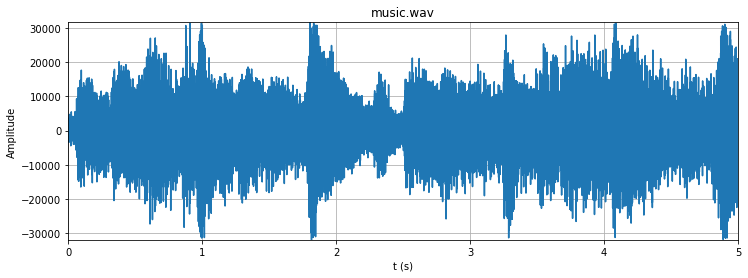

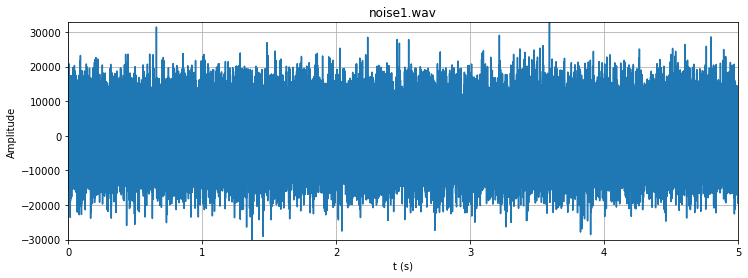

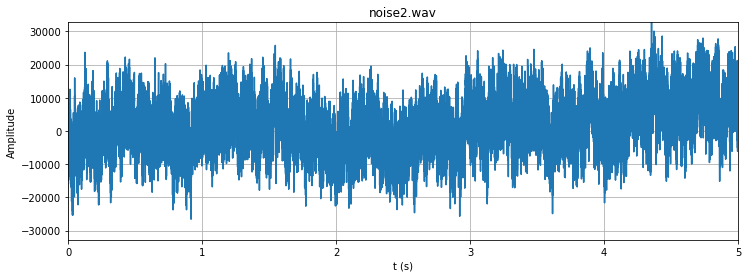

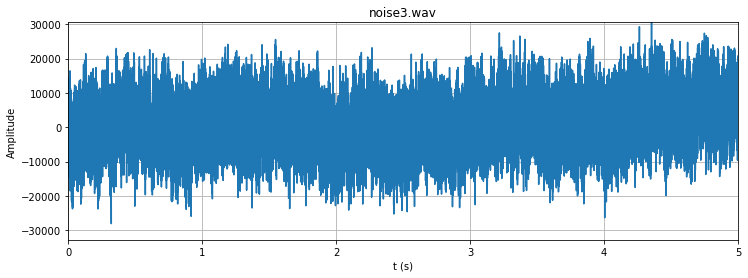

In [6]:
for x,y,z in zip(liste_audio,liste_freq,liste_name):
    plot_temporal(x,y,z)

In [7]:
Audio(liste_audio[0], rate=liste_freq[0])

In [8]:
Audio(liste_audio[1], rate=liste_freq[1])

In [9]:
Audio(liste_audio[2], rate=liste_freq[2])

## Simulate a noisy version of the music using the noises at various SNR Level

In [10]:
snr=[0.001, 5,10,15, 20]
# sigma = np.sqrt((np.linalg.norm(music_wav,ord=1)**2)/(n_1*10**(50/10)))
# noise = np.random.normal(0, sigma, len(music_wav))

In [12]:
#sigma = np.sqrt(np.mean(fft.fft(music_wav).real**2)/snr)
#sigma = np.sqrt((np.linalg.norm(music_wav,ord=1)**2)/(n_1*10**(50/10)))
sigma = np.sqrt((np.linalg.norm(music_wav,ord=1)**2)/(n_1*10**(50/10)))
sigma

6818.4517641908305

In [13]:
noise = np.random.normal(0, sigma, len(music_wav))

In [14]:
sigma_vect = [np.sqrt((np.linalg.norm(music_wav,ord=2)**2)/(n_1*10**(i/10))) for i in snr ] 

In [15]:
noise_vect = [ np.random.normal(0, i, len(music_wav)) for i in sigma_vect]

In [17]:
music_with_noise_vect = [music_wav + i for i in noise_vect]

In [18]:
len(music_with_noise_vect)

5

In [19]:
Audio(noise_vect[0], rate=music_freq)

In [20]:
Audio(music_with_noise_vect[0], rate=music_freq)

In [21]:
Audio(music_with_noise_vect[1], rate=music_freq)

In [22]:
Audio(music_with_noise_vect[2], rate=music_freq)

In [23]:
Audio(music_with_noise_vect[3], rate=music_freq)

In [24]:
Audio(music_with_noise_vect[4], rate=music_freq)

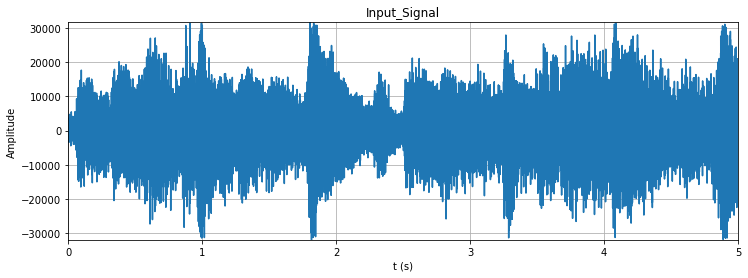

In [25]:
plot_temporal(music_wav,music_freq,"Input_Signal")

In [26]:
Audio(music_wav, rate=music_freq)

In [27]:
plot_temporal(music_with_noise_0,music_freq,n_1,"Input_Signal_with_noise")

NameError: name 'music_with_noise_0' is not defined

## Implement the spectral substraction method for denoising (search on my website about spectral substraction)

In [28]:
import scipy
import numpy as np
import librosa

# def stft(x, fftsize=1024, overlap=4):   
#     hop = int(fftsize / overlap)
#     w = np.hanning(fftsize+1)[:-1] 
#     print(f" {hop} ---- {len(x)-fftsize}")# better reconstruction with this trick +1)[:-1]  
#     return np.array([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)-fftsize, hop)])

# def istft(X, overlap=4):   
#     fftsize=(X.shape[1]-1)*2
#     hop = int(fftsize / overlap)
#     w = np.hanning(fftsize+1)[:-1]
#     x = np.zeros(X.shape[0]*hop)
#     wsum = np.zeros(X.shape[0]*hop) 
#     for n,i in enumerate(range(0, len(x)-fftsize, hop)): 
#         x[i:i+fftsize] += np.real(np.fft.irfft(X[n])) * w   # overlap-add
#         wsum[i:i+fftsize] += w ** 2.
#     pos = wsum != 0
#     x[pos] /= wsum[pos]
#     return x

# def stft(x, fftsize=1024, overlap=4):
#     hop=fftsize//overlap
#     w = np.hanning(fftsize+1)[:-1]      # better reconstruction with this trick +1)[:-1]  
#     return np.vstack([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)-fftsize, hop)])

# def istft(X, overlap=4):   
#     fftsize=(X.shape[1]-1)*2
#     hop=fftsize//overlap
#     w=np.hanning(fftsize+1)[:-1]
#     rcs=int(np.ceil(float(X.shape[0])/float(overlap)))*fftsize
#     print(rcs)
#     x=np.zeros(rcs)
#     wsum=np.zeros(rcs)
#     for n,i in zip(X,range(0,len(X)*hop,hop)): 
#         l=len(x[i:i+fftsize])
#         x[i:i+fftsize] += np.fft.irfft(n).real[:l]   # overlap-add
#         wsum[i:i+fftsize] += w[:l]
#     pos = wsum != 0
#     x[pos] /= wsum[pos]
#     return x

In [73]:
def spectral_subtraction(noise,input_signal, nabda):
    N=librosa.stft(noise)
    noise_magnetitude = np.abs(N)
    Y= librosa.stft(input_signal)
    input_magnetitude = np.abs(Y)

    #spectral subtraction
    #noise_mean = np.mean(noise_magnetitude, axis=1, dtype="float64")
    X_output = input_magnetitude* (1 - ((nabda**2)* (noise_magnetitude)**2/input_magnetitude**2 ))
    
    X= np.clip(X_output, a_min=0.0,a_max=None)
        
    #inverse STFT
    X_output = librosa.istft(X)
    return X_output
    

In [76]:
denoised_music = [spectral_subtraction(noise_vect[i],music_with_noise_vect[i],2) for i in range(0,len(noise_vect))]

In [77]:
Audio(denoised_music[0], rate=music_freq)

## Denoise the different given noisy version of the clean signal

## Discuss the parameters

In [ ]:
def spectral_subtraction(noise,input_signal, nabda):
    N=librosa.stft(noise)
    noise_magnetitude = np.abs(N)
    Y= librosa.stft(input_signal)
    input_magnetitude = np.abs(Y)
#     spectre_phase= np.angle(Y)
#     phase_info = np.exp(1.0j* spectre_phase)
#     print(f"{noise_magnetitude.shape}")
    #spectral subtraction
    noise_mean = np.mean(noise_magnetitude, axis=1, dtype="float64")
    #noise_mean = noise_mean[:, np.newaxis]
    print(f"{len(noise_mean)}")
    X_output = input_magnetitude* (1 - ((nabda**2)*noise_magnetitude/input_magnetitude ))
    X= np.clip(X_output, a_min=0.0,a_max=None)
    
    #add phase info
    #X = X*phase_info
    
    #inverse STFT
    X_output = librosa.istft(X)
    return X_output